In [7]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))

In [8]:
set.seed(42)
getwd()

[1] "/data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Adipocyte/code"

In [9]:
obj.rna <- readRDS("../data/snRNA/snRNA.rds")
obj.rna

An object of class Seurat 
29126 features across 403 samples within 1 assay 
Active assay: RNA (29126 features, 2000 variable features)
 4 dimensional reductions calculated: pca, harmony, umap_harmony, umap

In [10]:
obj.rna@meta.data$`RNA_snn_res.0.1` <- NULL
obj.rna@meta.data$`RNA_snn_res.0.2` <- NULL
obj.rna@meta.data$`RNA_snn_res.0.4` <- NULL
obj.rna@meta.data$`RNA_snn_res.0.8` <- NULL
obj.rna@meta.data$`RNA_snn_res.1` <- NULL

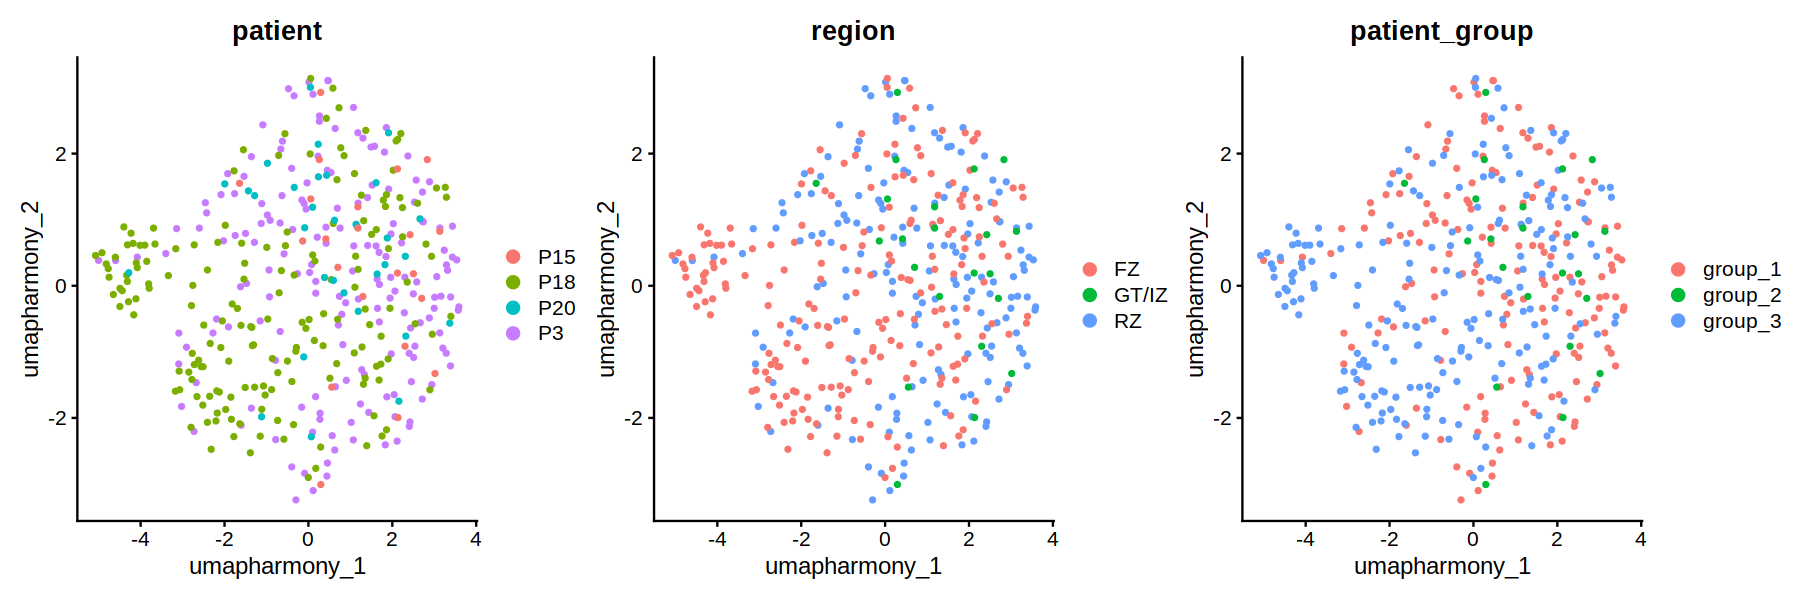

In [11]:
options(repr.plot.height = 5, repr.plot.width = 15)

p1 <- DimPlot(obj.rna, reduction = "umap_harmony", group.by = "patient")
p2 <- DimPlot(obj.rna, reduction = "umap_harmony", group.by = "region")
p3 <- DimPlot(obj.rna, reduction = "umap_harmony", group.by = "patient_group")

p1 + p2 + p3

In [ ]:
# options(repr.plot.height = 10, repr.plot.width = 10)

# ps1 <- plot_density(obj.rna, features=c("PTPRC", "PECAM1", "CPA3", "KIT"), 
#                     reduction="umap_harmony", combine = TRUE)

# ps1

In [12]:
resolutions <- seq(0.1, 1, 0.1)

obj.rna <- FindNeighbors(obj.rna, reduction = "harmony", dims = 1:30)
obj.rna <- FindClusters(obj.rna, resolution = resolutions, verbose = FALSE)

Computing nearest neighbor graph

Computing SNN



Loading required package: ggraph

Warning message:
“The `add` argument of `group_by()` is deprecated as of dplyr 1.0.0.
Please use the `.add` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


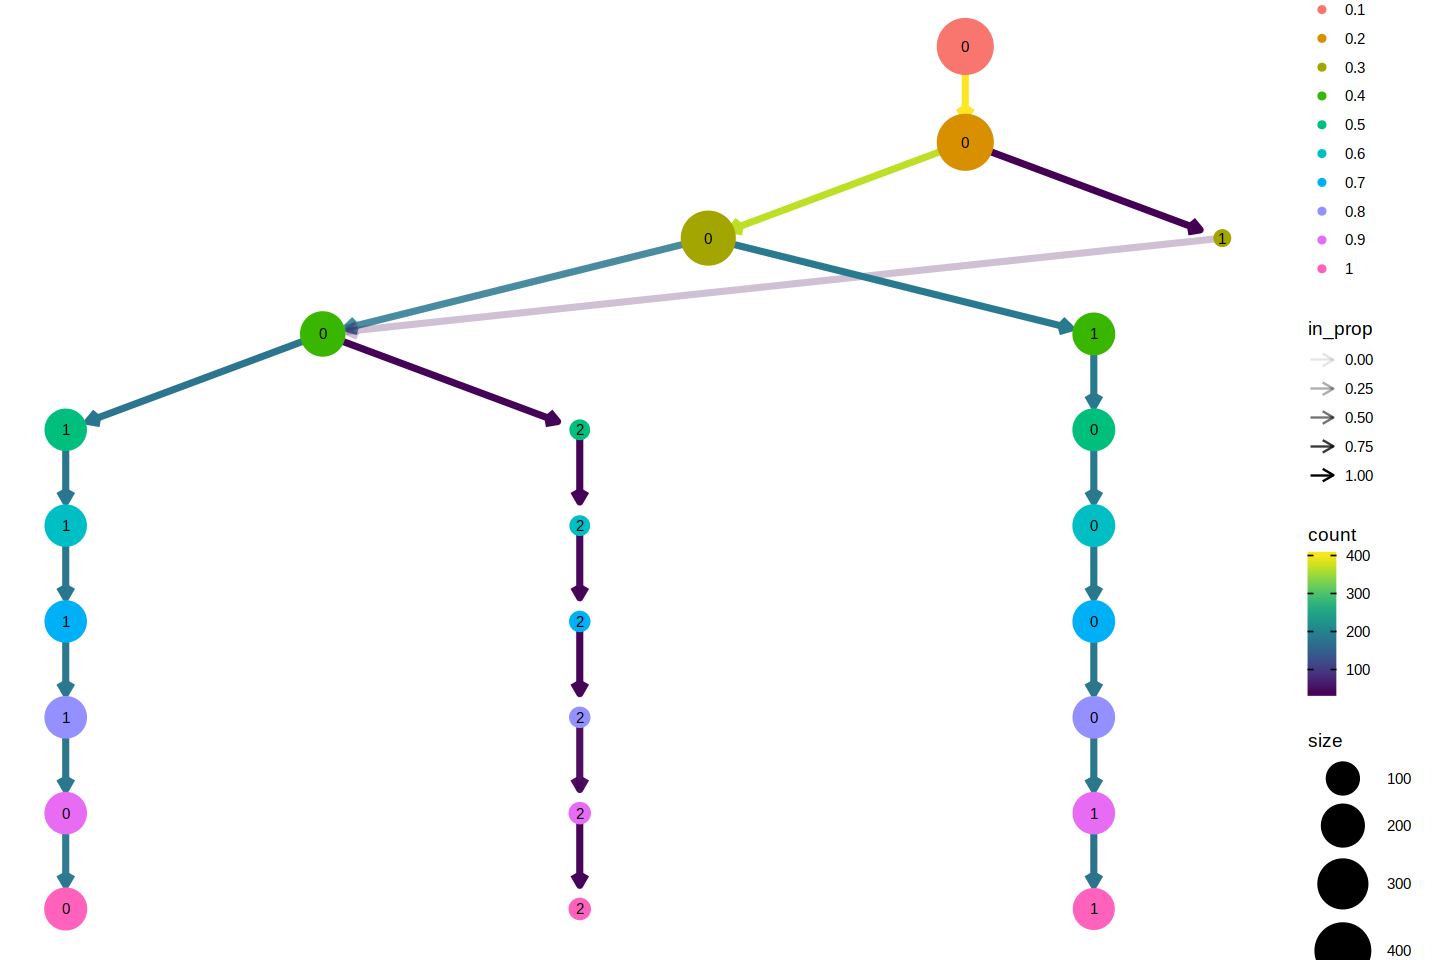

In [13]:
library(clustree)

options(repr.plot.height = 8, repr.plot.width = 12)

clustree(obj.rna, prefix = "RNA_snn_res.")

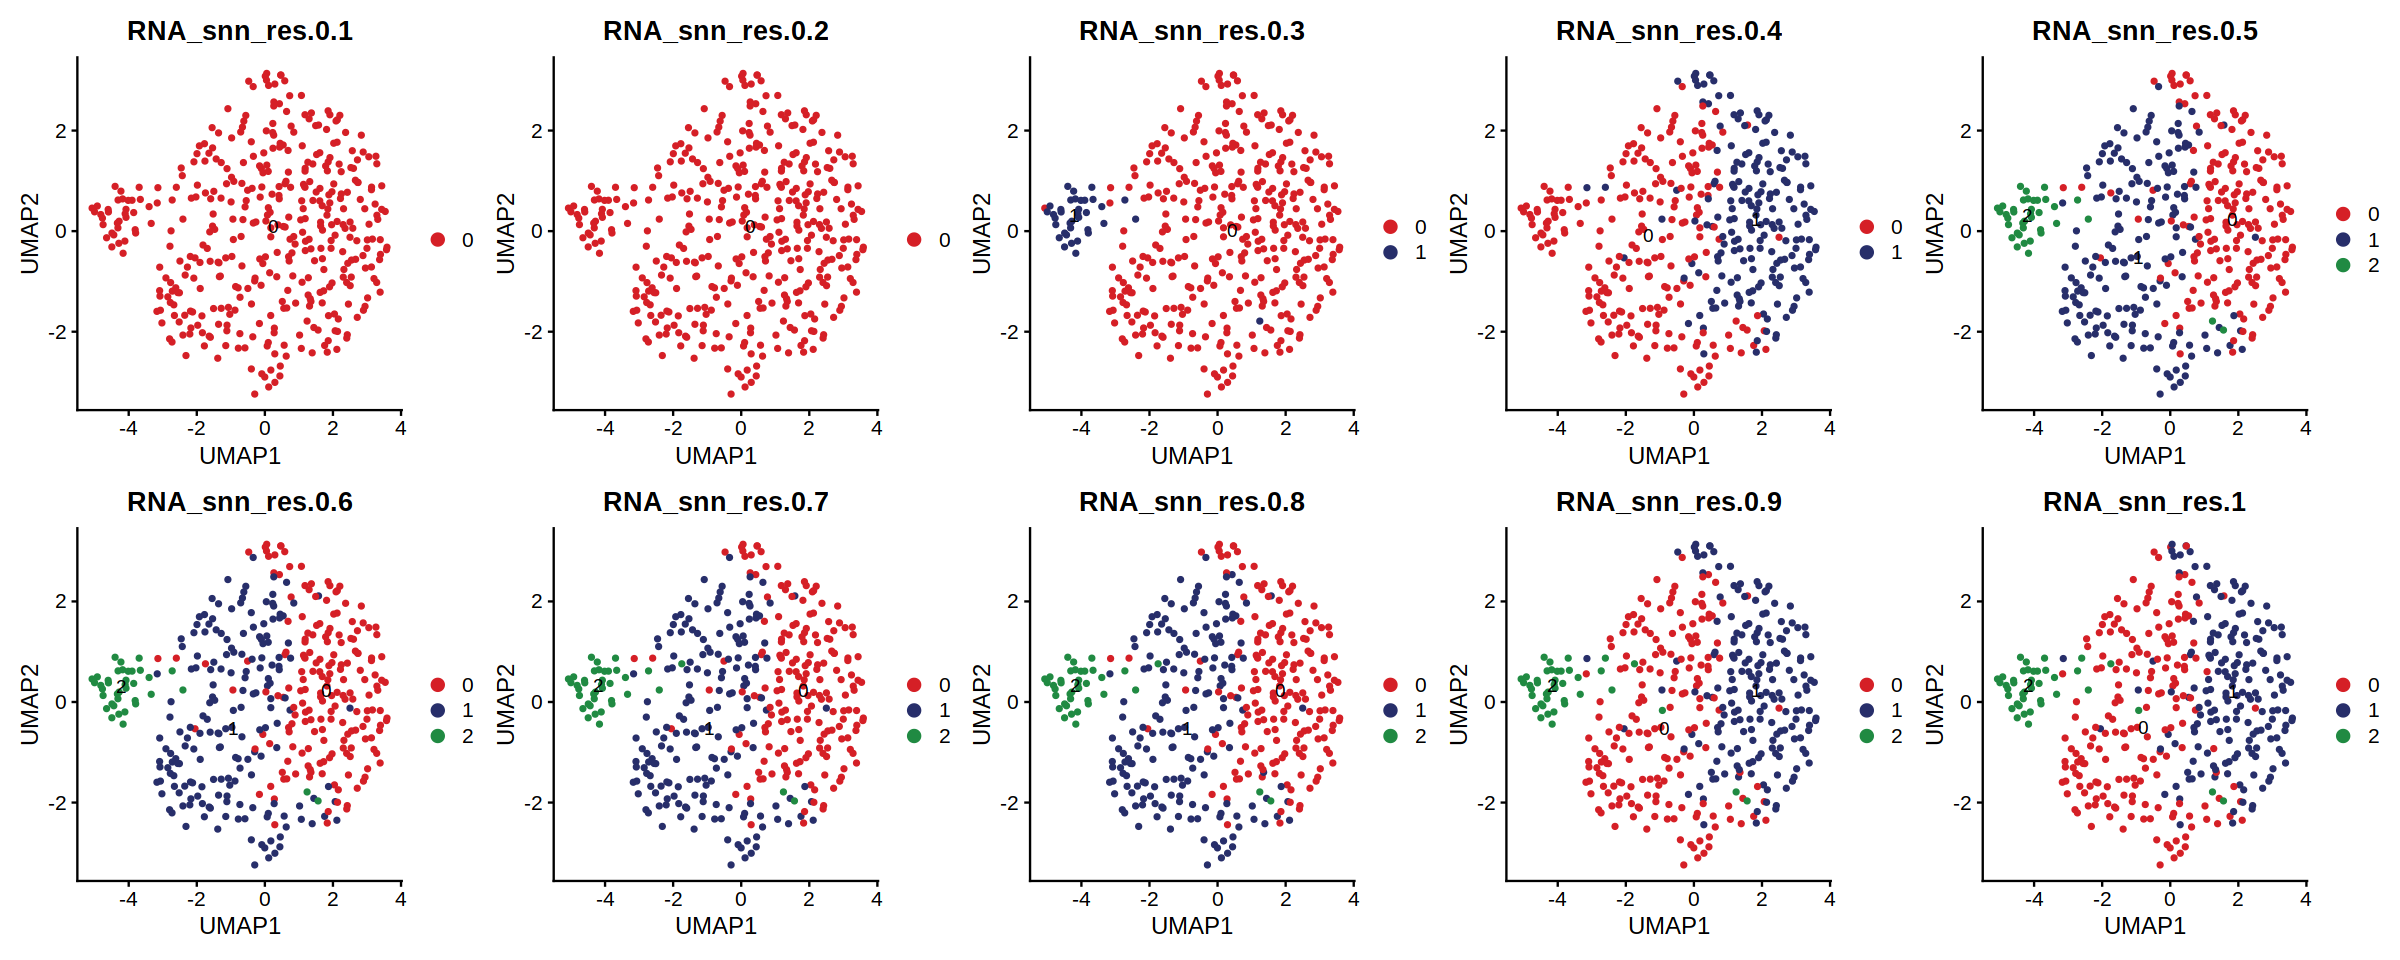

In [14]:
options(repr.plot.height = 8, repr.plot.width = 20)

plotlist <- lapply(resolutions, function(x){
    cols <- ArchR::paletteDiscrete(obj.rna@meta.data[, glue::glue("RNA_snn_res.{x}")])
    
    p <- DimPlot(obj.rna, group.by = glue::glue("RNA_snn_res.{x}"), label = TRUE,
             reduction = "umap_harmony", shuffle = TRUE) +
    scale_color_manual(values = cols) +
    xlab("UMAP1") + ylab("UMAP2")
    
    p
})

p <- patchwork::wrap_plots(plotlist, ncol = 5)

p

Calculating cluster 0

Calculating cluster 1

Calculating cluster 0

Calculating cluster 1

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



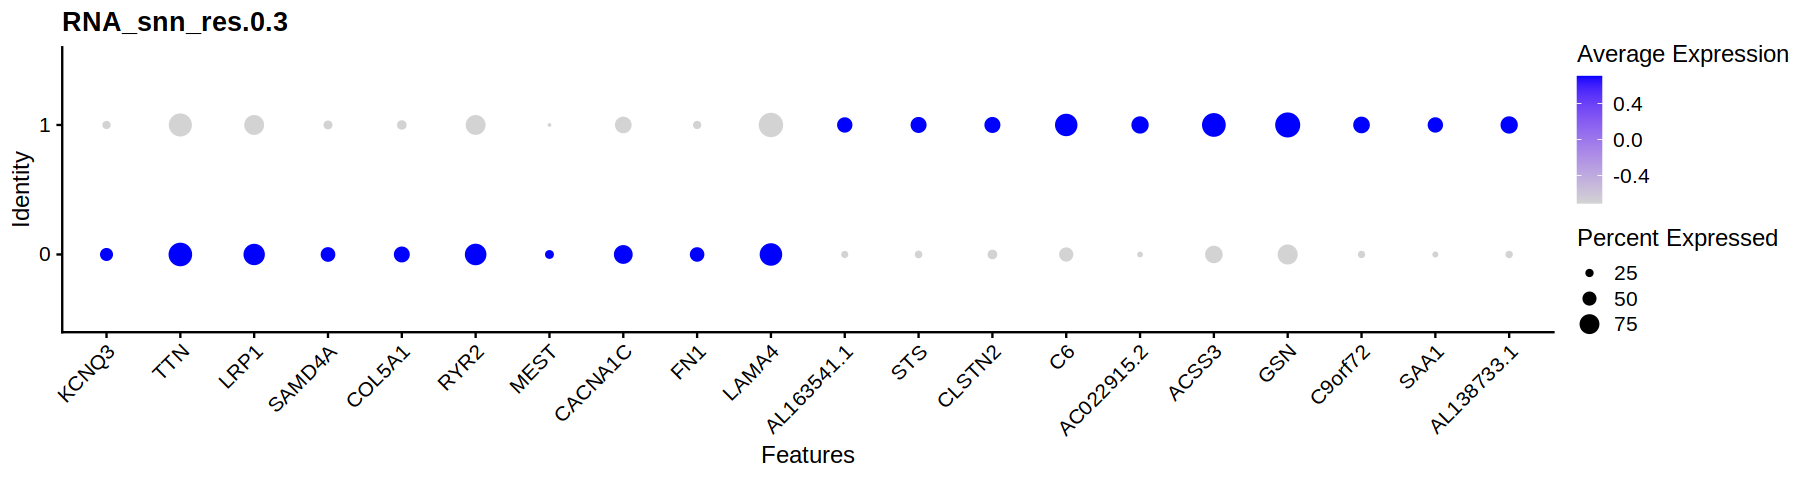

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



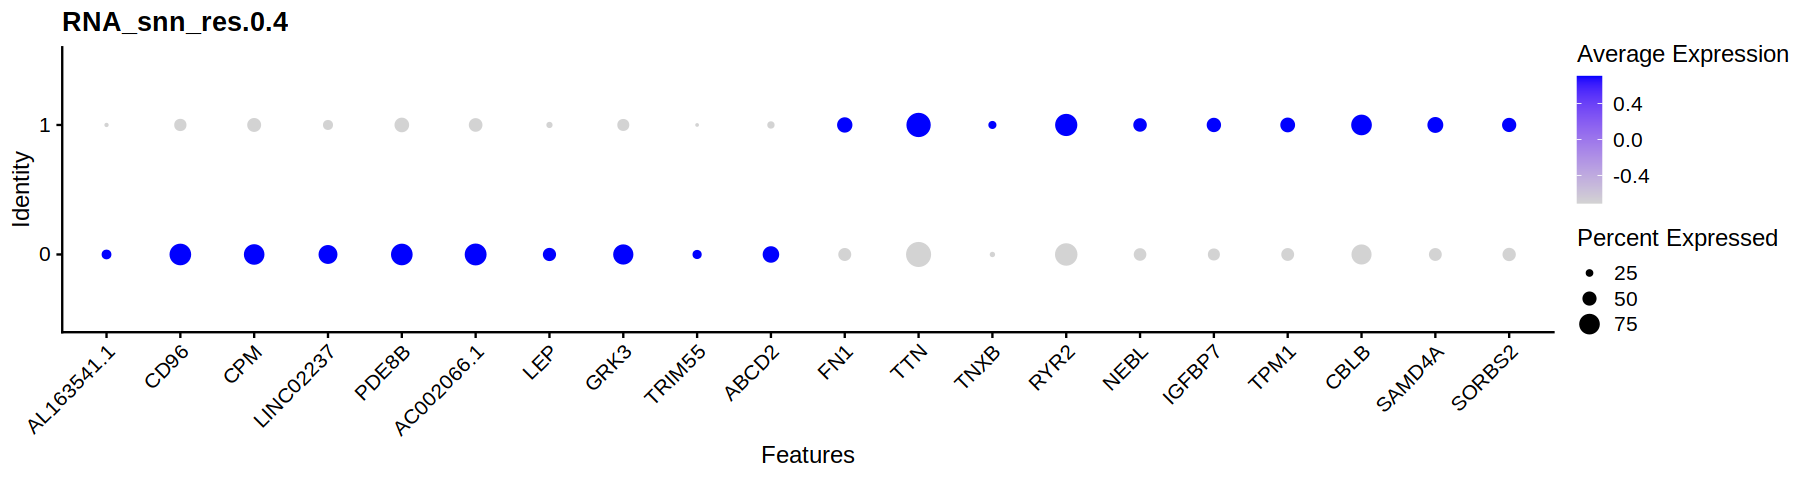

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



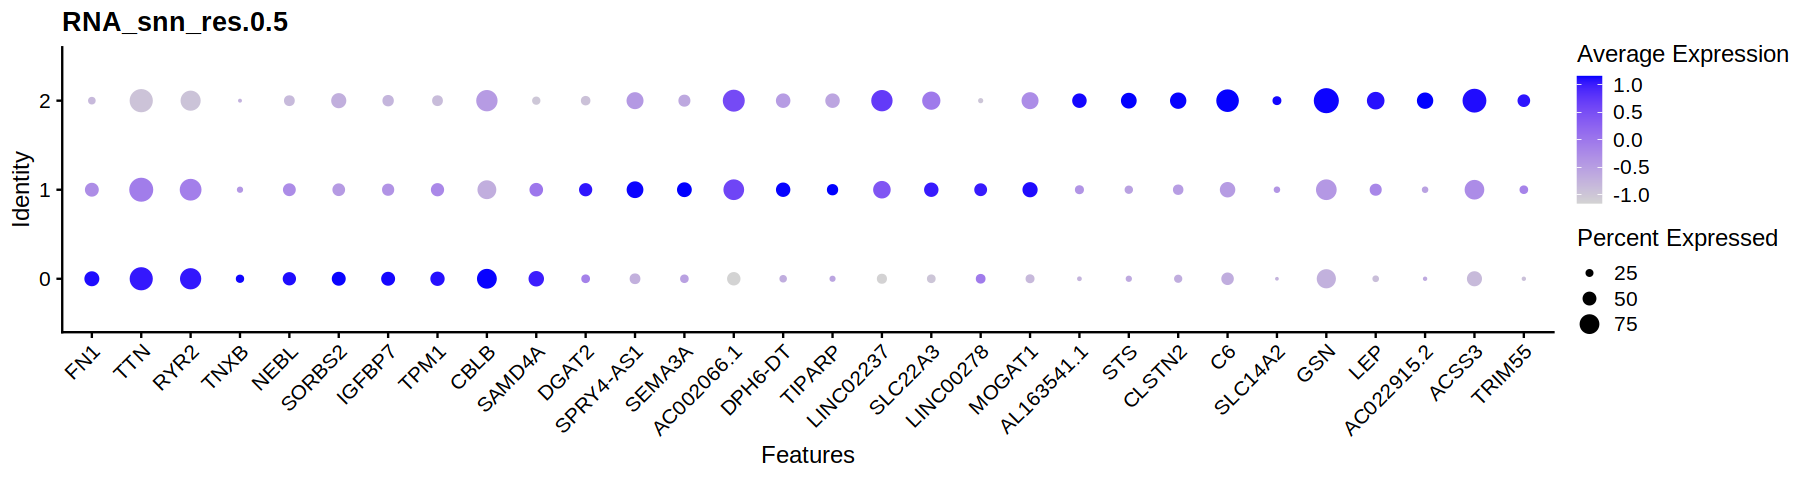

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



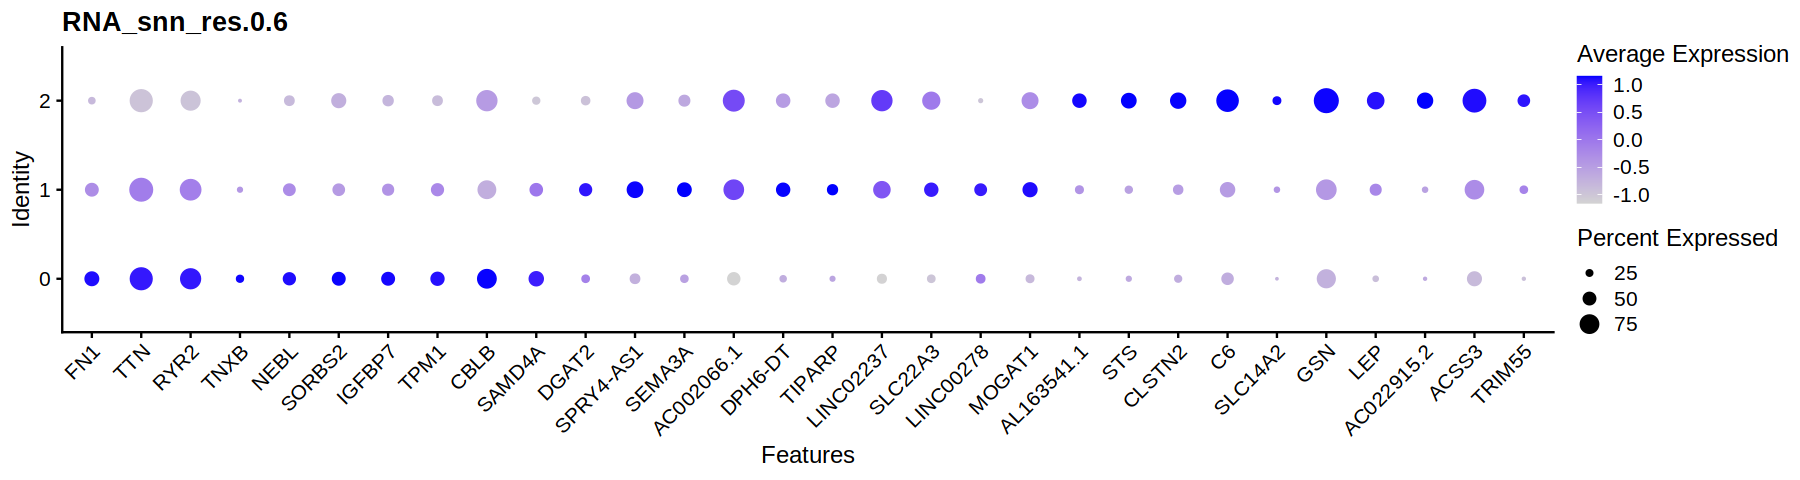

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



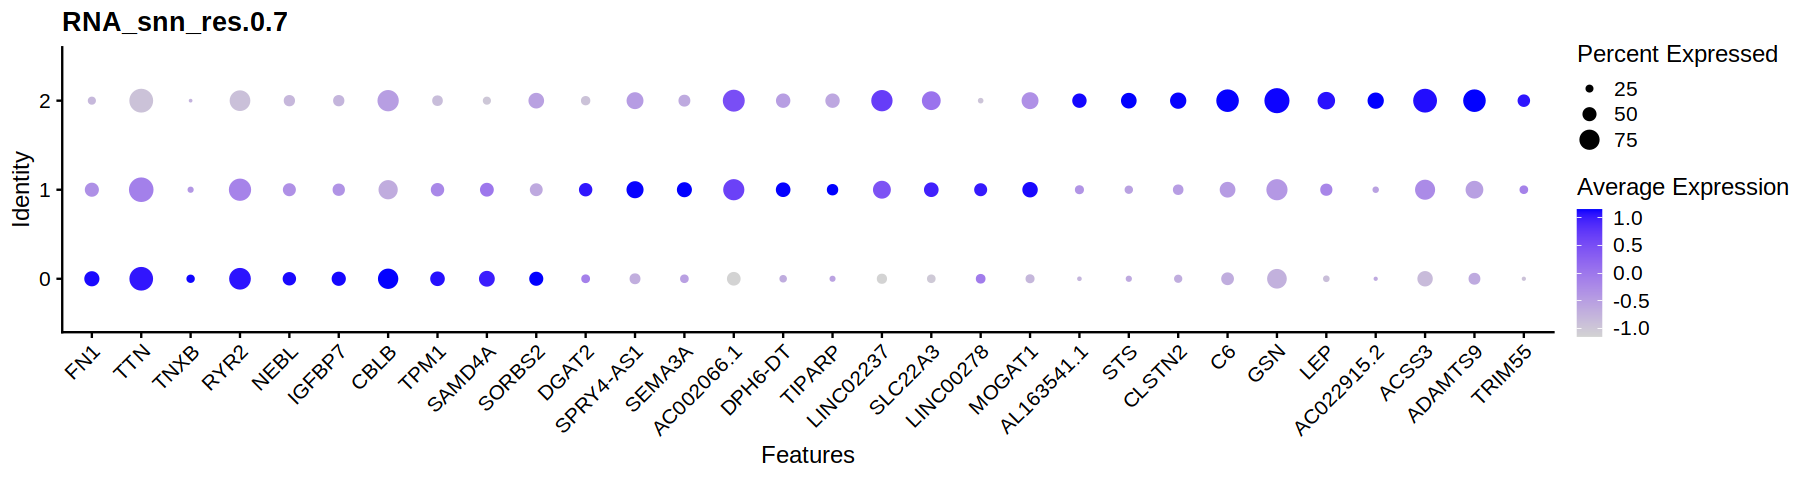

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



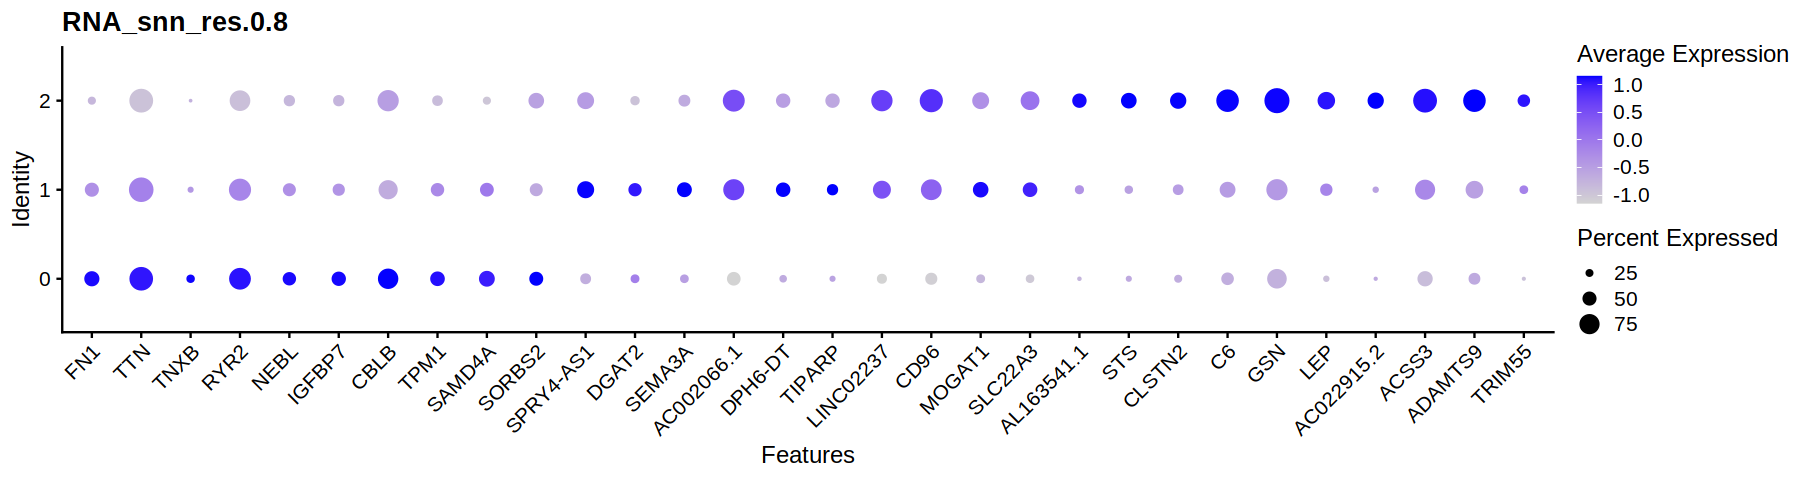

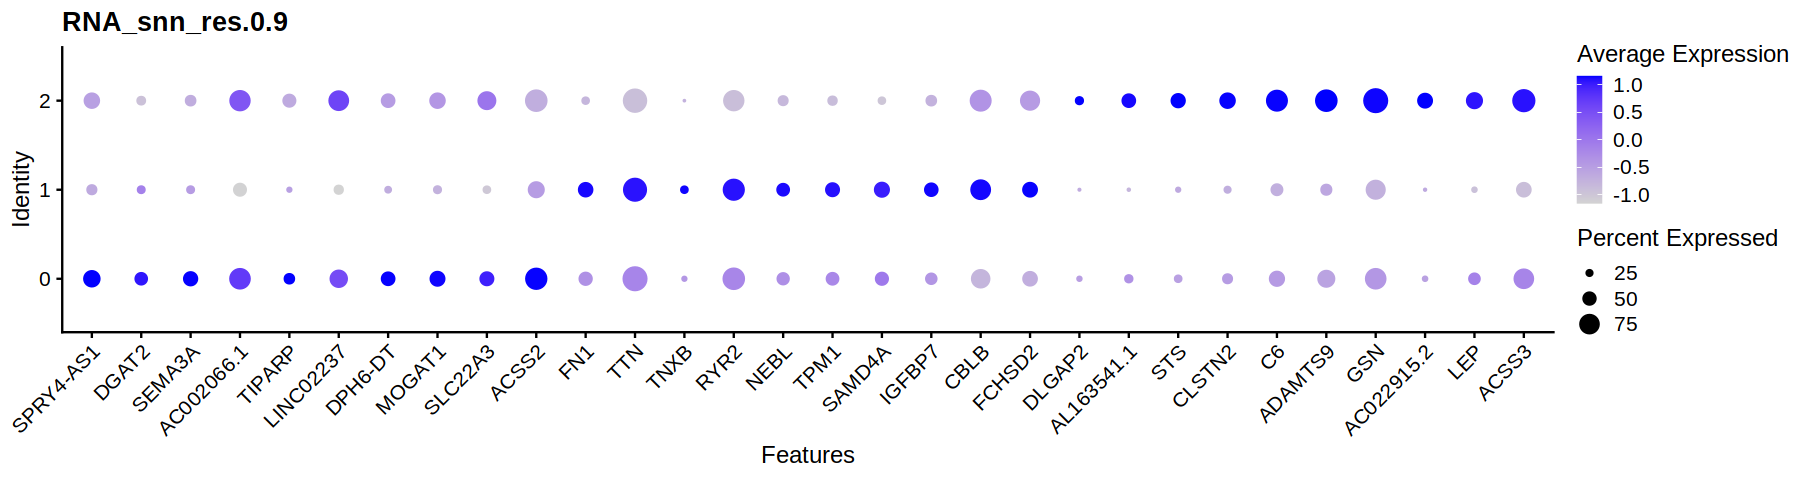

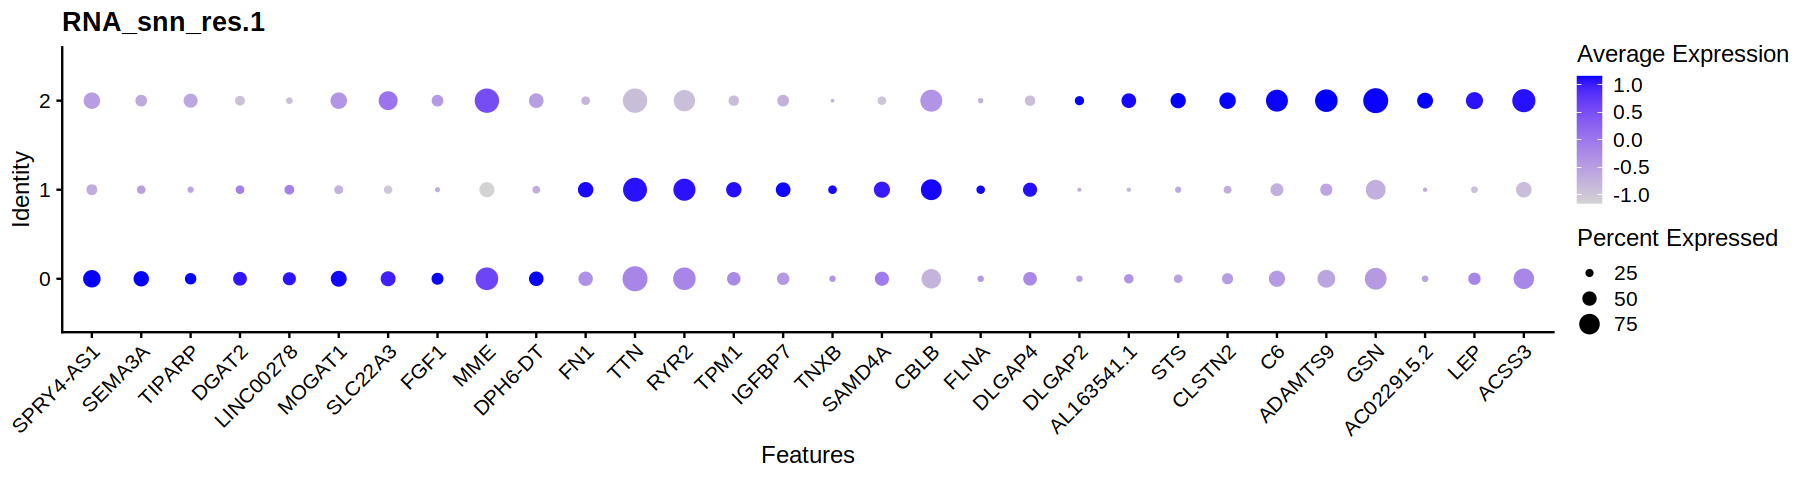

In [17]:
options(repr.plot.height = 4, repr.plot.width = 15)

if(!dir.exists("../data/snRNA/MarkerGenes")){
    dir.create("../data/snRNA/MarkerGenes")
}

for(res in seq(0.3, 1, 0.1)){
    Idents(obj.rna) <- glue::glue("RNA_snn_res.{res}")
    
    all.markers <- FindAllMarkers(obj.rna, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
    
    df <- all.markers %>%
    group_by(cluster) %>%
    slice_max(n = 10, order_by = avg_log2FC)
    
    p <- DotPlot(obj.rna, features = unique(df$gene)) + RotatedAxis() + ggtitle(glue::glue("RNA_snn_res.{res}"))
    
    print(p)
    
    markerList <- split(all.markers, all.markers$cluster)
    
    for(i in 1:length(markerList)){
        markerList[[i]] <- markerList[[i]][order(-markerList[[i]]$avg_log2FC), ]
    }
    
    WriteXLS::WriteXLS(markerList,
                   ExcelFileName = glue::glue("../data/snRNA/MarkerGenes/res.{res}.xlsx"),
                   SheetNames = names(markerList))

    saveRDS(all.markers, glue::glue("../data/snRNA/MarkerGenes/res.{res}.rds"))
}

In [ ]:
saveRDS(obj.rna, file = "../data/snRNA/snRNA.Rds")

In [ ]:
sessionInfo()